### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
   Installed Roots ─ v2.2.1
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
    Updating `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`
  [f2b01f46] ↑ Roots v2.2.0 ⇒ v2.2.1
Precompiling project...
  ✓ Roots
  ✓ FunctionZeros
  ✓ BoostFractor
  3 dependencies successfully precompiled in 10 seconds. 228 already precompiled. 1 skipped during auto due to previous errors.


In [2]:
using Dragoon
using Plots

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(20.025e9,n) # initial disc configuration

freqs = genFreqs(20.025e9,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(20.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster

obj = ObjAnalytical

hist = initHist(booster,2*(booster.ndisk^2),freqs,obj);

### Optimizer

In [4]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-12,
                    obj,
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e5),
                    showtrace=true,
                    showevery=10000,
                    unstuckisiter=true,);

Iter: 10000, timestamp: 9 minutes, 19 seconds
Iter finished. Objective value: -13079.381

Iter: 20000, timestamp: 9 minutes, 26 seconds
Iter finished. Objective value: -13125.782

Minimum simplex size reached.
No unstucking tried. Terminating.
Terminated. 20391 Iterations.
Final objective value: -13126.469
Elapsed movement time:  9 minutes, 26 seconds
Summed distance:   0.37
Elapsed computing time: 7 seconds, 944 milliseconds


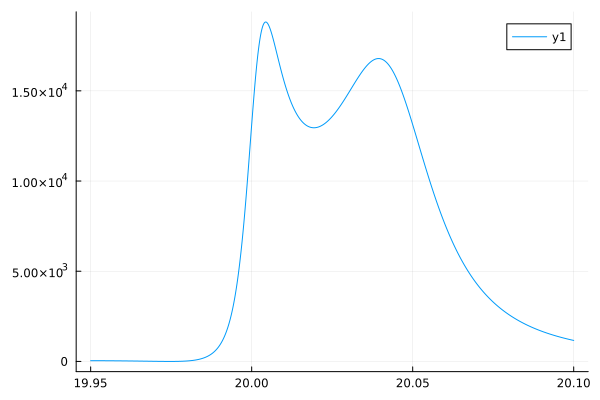

In [5]:
p0 = copy(booster.pos)

plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

In [6]:
freqs1 = collect(range(20.05e9,20.10e9,10))

scale = freqs[1]/(freqs[1]+50e6)

0.9975062344139651

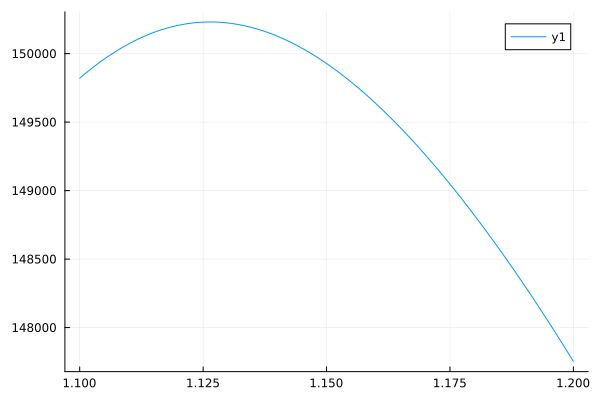

1.1264


In [9]:
move(booster,p0; additive=false)

rescale(booster,hist,freqs1,obj,scale,(1.0,1.2),1000)

In [ ]:
move(booster,p0; additive=false)

dragoon(booster,hist,50e6,5e6,
        obj,UnstuckExpand(2,12_000);
        fmin=20e9,fmax=20.1e9,nfreqs=10,
        scalerange=(1.0,1.2),scalesteps=1000)